# Netherlands vehicle owner data base analysis
[opendata.rdw.nl](https://opendata.rdw.nl/Voertuigen/Open-Data-RDW-Gekentekende_voertuigen/m9d7-ebf2)

In [ ]:
import requests
import json
import pandas as pd
size= 5000 #5000 is the limit
cursor = 0
df = pd.DataFrame()
count =0
#while count<500: #this reads just size*5 times 
while True: #this loads all of the data
    count = count+1
    url=f"https://opendata.rdw.nl/resource/m9d7-ebf2.json?$limit={size}&$offset={cursor}"
    response = requests.get(url)
    resp = response.json()
    items = pd.DataFrame(resp)
    df = pd.concat([df,items])
    print(f"offset: {cursor}\t, size: {size}\t, count:{count}")
    cursor += size
    if len(resp)==0:
        break
df.to_csv("../data/rdw.zip", 
           index=False, 
           compression="zip")
df.head()

offset: 0	, size: 5000	, count:1
offset: 5000	, size: 5000	, count:2
offset: 10000	, size: 5000	, count:3
offset: 15000	, size: 5000	, count:4
offset: 20000	, size: 5000	, count:5
offset: 25000	, size: 5000	, count:6
offset: 30000	, size: 5000	, count:7
offset: 35000	, size: 5000	, count:8
offset: 40000	, size: 5000	, count:9
offset: 45000	, size: 5000	, count:10
offset: 50000	, size: 5000	, count:11
offset: 55000	, size: 5000	, count:12
offset: 60000	, size: 5000	, count:13
offset: 65000	, size: 5000	, count:14
offset: 70000	, size: 5000	, count:15
offset: 75000	, size: 5000	, count:16
offset: 80000	, size: 5000	, count:17
offset: 85000	, size: 5000	, count:18
offset: 90000	, size: 5000	, count:19
offset: 95000	, size: 5000	, count:20
offset: 100000	, size: 5000	, count:21
offset: 105000	, size: 5000	, count:22
offset: 110000	, size: 5000	, count:23
offset: 115000	, size: 5000	, count:24
offset: 120000	, size: 5000	, count:25
offset: 125000	, size: 5000	, count:26
offset: 130000	, siz

# data cleanup

In [169]:
df.rename(columns={'kenteken': 'plate'}, inplace=True)
df.rename(columns={'merk': 'make'}, inplace=True)
df.rename(columns={'handelsbenaming': 'model'}, inplace=True)
df.rename(columns={'lengte': 'length'}, inplace=True)
df.rename(columns={'breedte': 'width'}, inplace=True)
df.rename(columns={'inrichting': 'type'}, inplace=True)
df.rename(columns={'voertuigsoort': 'kind'}, inplace=True)
df.rename(columns={'bruto_bpm': 'max_load'}, inplace=True)
df.rename(columns={'europese_voertuigcategorie': 'eu_class'}, inplace=True)

omit = ['vervaldatum_apk','datum_tenaamstelling','aantal_zitplaatsen','max_load','eerste_kleu','tweede_kleur',
        'aantal_cilinders','cilinderinhoud','aanhangwagen_autonoom_geremd','aanhangwagen_middenas_geremd','vervaldatum_tachograaf',
        'vervaldatum_tachograaf_dt','type_gasinstallatie','oplegger_geremd','afwijkende_maximum_snelheid','verticale_belasting_koppelpunt_getrokken_voertuig',
        'aantal_staanplaatsen','subcategorie_nederland','eerste_kleur','massa_ledig_voertuig','toegestane_maximum_massa_voertuig','massa_rijklaar',
        'maximum_massa_trekken_ongeremd','api_gekentekende_voertuigen_carrosserie_specifiek','api_gekentekende_voertuigen_voertuigklasse',
        'europese_voertuigcategorie_toevoeging','europese_uitvoeringcategorie_toevoeging','registratie_datum_goedkeuring_afschrijvingsmoment_bpm',
        'registratie_datum_goedkeuring_afschrijvingsmoment_bpm_dt','laadvermogen','maximum_last_onder_de_vooras_sen_tezamen_koppeling','maximale_constructiesnelheid',
        'hoogte_voertuig','maximum_trekken_massa_geremd','datum_eerste_toelating','datum_eerste_tenaamstelling_in_nederland','wacht_op_keuren',
        'catalogusprijs','code_toelichting_tellerstandoordeel','tenaamstellen_mogelijk','vervaldatum_apk_dt','datum_tenaamstelling_dt',
        'datum_eerste_toelating_dt','datum_eerste_tenaamstelling_in_nederland_dt','zuinigheidsclassificatie','api_gekentekende_voertuigen_assen',
        'api_gekentekende_voertuigen_brandstof','api_gekentekende_voertuigen_carrosserie','wam_verzekerd','aantal_deuren','aantal_wielen',
        'afstand_hart_koppeling_tot_achterzijde_voertuig','afstand_voorzijde_voertuig_tot_hart_koppeling','vermogen_massarijklaar','wielbasis',
        'export_indicator','openstaande_terugroepactie_indicator','taxi_indicator','maximum_massa_samenstelling','aantal_rolstoelplaatsen',
        'maximum_ondersteunende_snelheid','jaar_laatste_registratie_tellerstand','tellerstandoordeel','plaats_chassisnummer','technische_max_massa_voertuig','type',
        'typegoedkeuringsnummer','variant','uitvoering','volgnummer_wijziging_eu_typegoedkeuring','hoogte_voertuig_minimum','hoogte_voertuig_maximum',
        'wielbasis_voertuig_minimum','wielbasis_voertuig_maximum','lengte_voertuig_minimum','lengte_voertuig_maximum','breedte_voertuig_minimum','breedte_voertuig_maximum',
       'breedte_voertuig_maximum','massa_bedrijfsklaar_minimaal','massa_bedrijfsklaar_maximaal']

for item in omit:
    try:
        df.drop(item, axis=1, inplace=True)
    except:
        pass
df.head(100)

,plate,kind,make,model,length,width,eu_class
0,K114FR,Personenauto,VOLKSWAGEN,TIGUAN,0,186,M1
1,ST510F,Personenauto,BMW,218I ACTIVE TOURER,435,0,M1
2,V618VS,Bedrijfsauto,NISSAN,NISSAN E-NV200,456,176,N1
3,78RTR7,Personenauto,VOLVO,S60,463,0,M1
4,43TTL4,Personenauto,AUDI,A5 SPORTBACK,0,0,M1
...,...,...,...,...,...,...,...
95,VLJ20N,Bedrijfsauto,VOLKSWAGEN,TRANSPORTER,530,190,N1
96,GV923N,Personenauto,MERCEDES-BENZ,A 180,0,0,M1
97,47PSNP,Personenauto,DAIHATSU,CUORE,341,0,M1
98,9THT72,Personenauto,MERCEDES-BENZ,A 170,384,0,M1


In [170]:
df.describe()

,plate,kind,make,model,length,width,eu_class
count,25000,25000,25000,24942,19680,22290,24998
unique,25000,15,1215,6921,781,183,29
top,K114FR,Personenauto,VOLKSWAGEN,N/A,0,0,M1
freq,1,12698,1808,503,6887,8747,12696


In [171]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   plate     25000 non-null  object
 1   kind      25000 non-null  object
 2   make      25000 non-null  object
 3   model     24942 non-null  object
 4   length    19680 non-null  object
 5   width     22290 non-null  object
 6   eu_class  24998 non-null  object
dtypes: object(7)
memory usage: 1.5+ MB
None


# class and kind matching
Now we want to see if the eu_class and the vehicle kind match. To do that, we drop the rows where columns and classes are null and hash the strings of kind and class.

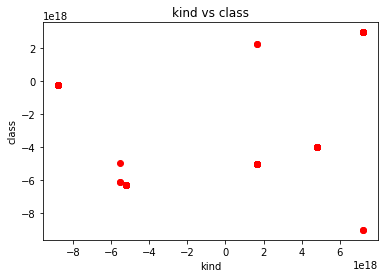

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = df.dropna(subset=['kind', 'eu_class']) #drops rows where these are null

x1 = [df['kind'].apply(lambda x: hash(x))]
y1 = [df['eu_class'].apply(lambda x: hash(x))]

regressor = LinearRegression()
regressor.fit(x, y)
y_pred = regressor.predict(x)
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.title('kind vs class')
plt.xlabel('kind')
plt.ylabel('class')
plt.show()

Hm, doesn't look like it, does it? Let's check again:

In [173]:
x2= df['kind'].apply(lambda x: hash(x))
y2= df['eu_class'].apply(lambda x: hash(x))
correlation = x2.corr(y2)
print(correlation)

-0.04627352661873107


Hm, still not good.

In [174]:
df[["length", "width"]] = df[["length", "width"]].apply(pd.to_numeric)
print(df['length'].corr(df['width']))
correlation_df = df.corr() #calculate all correlations in df

print(correlation_df)

0.49747738737986397
          length     width
length  1.000000  0.497477
width   0.497477  1.000000


In [175]:
df['kind'].unique()

array(['Personenauto', 'Bedrijfsauto', 'Bromfiets',
       'Land- of bosbouwtrekker', 'Motorfiets', 'Middenasaanhangwagen',
       'Oplegger', 'Driewielig motorrijtuig', 'Aanhangwagen',
       'Land- of bosb aanhw of getr uitr stuk', 'Bus',
       'Motorrijtuig met beperkte snelheid', 'Motorfiets met zijspan',
       'Mobiele machine', 'Autonome aanhangwagen'], dtype=object)

In [176]:
len(df['eu_class'].unique())

29

In [177]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24998 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   plate     24998 non-null  object 
 1   kind      24998 non-null  object 
 2   make      24998 non-null  object 
 3   model     24940 non-null  object 
 4   length    19680 non-null  float64
 5   width     22290 non-null  float64
 6   eu_class  24998 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.5+ MB
None
